# Cell Cell Communication:

Comparing sorted and unsorted plaque cell to cell communication

See CellphoneDB - Processing for file output

Plan to process sorted and unsorted data separately then compare results

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import omicverse as ov
import ktplotspy
import os

ov.plot_set()

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Set up data working directory:
data_path = '/home/jo388/rds/rds-zhao-group-HvBBlpwx4dc/ELLIPSE/sort_unsort/data/'
figure_path = '/home/jo388/rds/rds-zhao-group-HvBBlpwx4dc/ELLIPSE/sort_unsort/figures/'
figure_data = figure_path + "figure_data/"

%matplotlib inline


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/
Dependency error: The 'bioservices' distribution was not found and is required by the application


In [2]:
#Output session Info
import session_info
session_info.show()

KeyError: 'backports'

In [2]:
#Output package versions:
sc.logging.print_header()

scanpy==1.10.4 anndata==0.11.2 umap==0.5.7 numpy==1.26.4 scipy==1.11.4 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.13


In [3]:
adata = sc.read_h5ad(data_path + 'all_sort_unsort_fine_new_colors.h5ad')

# Filtered Analysis:
## Sorted

In [40]:
#Load cpdb_results object
import pickle
with open(data_path + "cpdb/cpdb_sorted_data_filtered_down.pkl", "rb") as input_file:
    cpdb_results = pickle.load(input_file)

In [41]:
interaction=ov.single.cpdb_network_cal(adata = adata,
        pvals = cpdb_results['pvalues'],
        celltype_key = "fine_clustering ")

ktplotspy have been install version: 0.2.6


In [42]:
interaction['interaction_edges'].head()

,SOURCE,TARGET,COUNT
0,C1Q+ Macro.,C1Q+ Macro.,74
1,C1Q+ Macro.,CD16+ NK,45
2,C1Q+ Macro.,CD16- NK,46
3,C1Q+ Macro.,CD4+ Teff,40
4,C1Q+ Macro.,CD4+ Tnaive,45


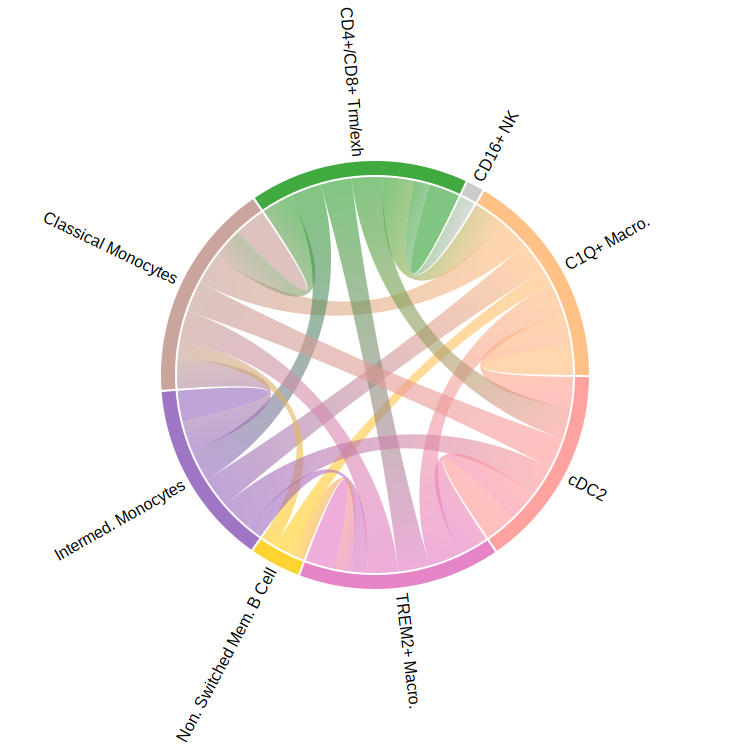

In [44]:
fig=ov.pl.cpdb_chord(adata,interaction['interaction_edges'],
                     celltype_key='fine_clustering',
                     count_min=50,fontsize=16,padding=175,radius=200,
                     save=figure_path + "Downsampled_Filtered_Sorted_Interaction_Chord.svg",)

fig.show()

# Filtered Analysis:
## Unsorted

In [45]:
#Load cpdb_results object
import pickle
with open(data_path + "cpdb/cpdb_unsorted_data_filtered_down.pkl", "rb") as input_file:
    cpdb_results = pickle.load(input_file)

In [46]:
interaction=ov.single.cpdb_network_cal(adata = adata,
        pvals = cpdb_results['pvalues'],
        celltype_key = "fine_clustering ")

ktplotspy have been install version: 0.2.6


In [47]:
interaction['interaction_edges'].head()

,SOURCE,TARGET,COUNT
0,C1Q+ Macro.,C1Q+ Macro.,63
1,C1Q+ Macro.,CD16+ NK,48
2,C1Q+ Macro.,CD16- NK,47
3,C1Q+ Macro.,CD4+ Teff,44
4,C1Q+ Macro.,CD4+ Tnaive,47


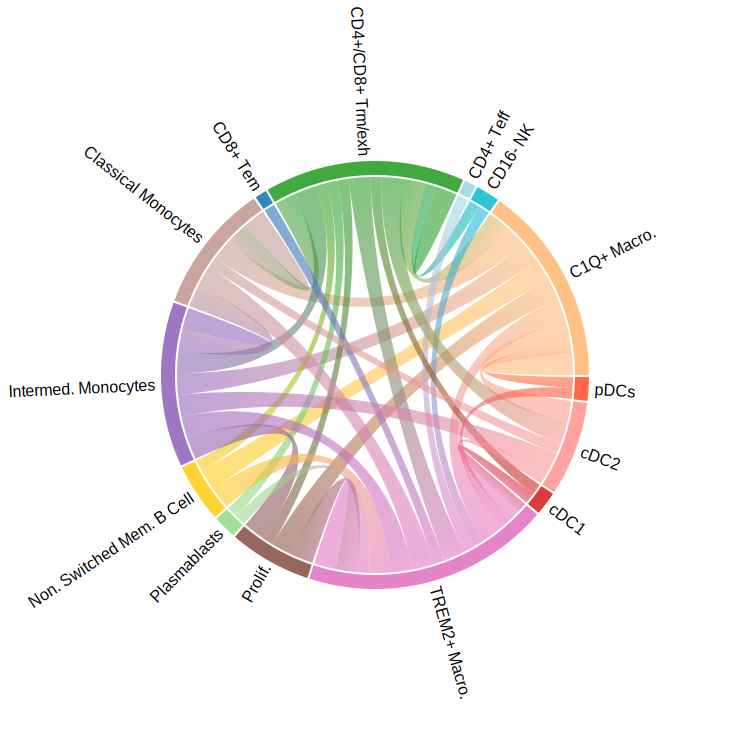

In [49]:
fig=ov.pl.cpdb_chord(adata,interaction['interaction_edges'],
                     celltype_key='fine_clustering',
                     count_min=50,fontsize=16,padding=175,radius=200,
                     save=figure_path + "Downsampled_Filtered_Unsorted_Interaction_Chord.svg",)

fig.show()